## 作業二

In [35]:
! wget https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/article.txt

--2022-10-26 07:33:34--  https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/article.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17982 (18K) [text/plain]
Saving to: ‘article.txt.1’

article.txt.1       100%[===================>]  17.56K  --.-KB/s    in 0s      

2022-10-26 07:33:34 (126 MB/s) - ‘article.txt.1’ saved [17982/17982]



In [36]:
import requests 
res = requests.get('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/article.txt')
with open('article2.txt', 'w') as f:
  f.write(res.text)

In [37]:
with open('article.txt', encoding = 'utf-8') as f:
  data = f.read()

In [38]:
import jieba
#list(jieba.cut(data))

In [39]:
words = jieba.lcut(data)

In [40]:
type(words)

list

### 方法一

In [41]:
a = [1,1,2,2,1,3,1]
dic = {}
for w in a:
  if w not in dic:
    dic[w] = 1
  else:
    dic[w] = dic[w] + 1
dic

{1: 4, 2: 2, 3: 1}

In [42]:
dic = {}
for word in words:
  if len(word) >= 2:
    if word not in dic:
      dic[word] = 1
    else:
      dic[word] = dic[word] + 1

In [43]:
swd = sorted(dic.items(), key = lambda e: e[1], reverse=True)
swd[0:10]

[('我們', 68),
 ('台灣', 41),
 ('發展', 26),
 ('產業', 24),
 ('國家', 22),
 ('未來', 20),
 ('人民', 18),
 ('社會', 18),
 ('全球', 18),
 ('國際', 17)]

### 方法二

In [44]:
dic = {}
for word in words:
  if len(word) >= 2:
    dic[word] = dic.get(word, 0) + 1

In [45]:
swd = sorted(dic.items(), key = lambda e: e[1], reverse=True)
swd[0:10]

[('我們', 68),
 ('台灣', 41),
 ('發展', 26),
 ('產業', 24),
 ('國家', 22),
 ('未來', 20),
 ('人民', 18),
 ('社會', 18),
 ('全球', 18),
 ('國際', 17)]

### 方法三

In [46]:
from collections import Counter
c = Counter([w for w in words if len(w) >=2])
c.most_common(10)

[('我們', 68),
 ('台灣', 41),
 ('發展', 26),
 ('產業', 24),
 ('國家', 22),
 ('未來', 20),
 ('人民', 18),
 ('社會', 18),
 ('全球', 18),
 ('國際', 17)]

In [47]:
import wordcloud

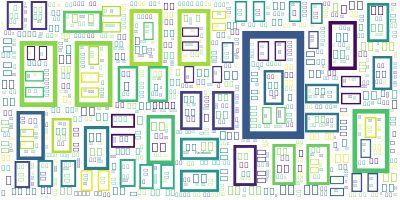

In [48]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(' '.join(jieba.cut(data)))
wordcloud.to_image()

In [49]:
! wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip

--2022-10-26 07:33:36--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 142.250.81.208, 2607:f8b0:4004:82f::2010
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|142.250.81.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip.1’

NotoSansCJKtc-hinte 100%[===================>] 115.63M   142MB/s    in 0.8s    

2022-10-26 07:33:37 (142 MB/s) - ‘NotoSansCJKtc-hinted.zip.1’ saved [121247366/121247366]



In [50]:

! unzip NotoSansCJKtc-hinted.zip

Archive:  NotoSansCJKtc-hinted.zip
replace LICENSE_OFL.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

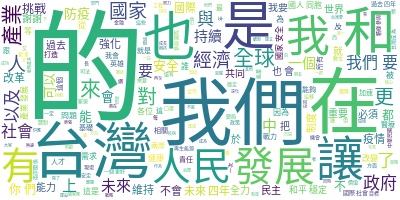

In [51]:
wc = WordCloud(background_color='white',font_path='/content/NotoSansCJKtc-Regular.otf')
wc.generate(' '.join(jieba.cut(data)))
wc.to_image()

## 詞頻矩陣

In [52]:
sentences = ["How to format my hard disk", "Hard disk format problems"]

In [53]:
words_set = []
for sentence in sentences:
  words = sentence.lower().split()
  words_set = words_set + words

In [54]:
set(words_set)

{'disk', 'format', 'hard', 'how', 'my', 'problems', 'to'}

In [55]:
id_to_word = {}
word_to_id = {}
for idx, word in enumerate(set(words_set)):
  #print(idx, word)
  id_to_word[idx] = word
  word_to_id[word] = idx

In [56]:
id_to_word

{0: 'to', 1: 'format', 2: 'disk', 3: 'hard', 4: 'problems', 5: 'how', 6: 'my'}

In [57]:
word_to_id

{'to': 0, 'format': 1, 'disk': 2, 'hard': 3, 'problems': 4, 'how': 5, 'my': 6}

In [58]:
import numpy as np
m = np.zeros((len(sentences), len(word_to_id)))

In [59]:
m.shape

(2, 7)

In [60]:
for i, sentence in enumerate(sentences):
  for w in sentence.lower().split():
    #print(w, i, word_to_id[w])
    m[i, word_to_id[w]] = 1

In [61]:
m

array([[1., 1., 1., 1., 0., 1., 1.],
       [0., 1., 1., 1., 1., 0., 0.]])

##Bag of Words Practice

In [ ]:
paragraph = '''How many special people change?
How many lives are livin' strange?
Where were you while we were getting high?
Slowly walkin' down the hall
Faster than a cannonball
Where were you while we were getting high?
Someday you will find me
Caught beneath the landslide
In a champagne supernova in the sky
Someday you will find me
Caught beneath the landslide
In a champagne supernova
A champagne supernova in the sky
Wake up the dawn and ask her why
A dreamer dreams she never dies
Wipe that tear away now from your eye
Slowly walkin' down the hall
Faster than a cannonball
Where were you while we were getting high?
Someday you will find me
Caught beneath the landslide
In a champagne supernova in the sky
Someday you will find me
Caught beneath the landslide
In a champagne supernova
A champagne supernova
'Cause people believe
That they're gonna get away for the summer
But you and I, we live and die
The world's still spinnin' 'round, we don't know why
Why, why, why, why
How many special people change?
How many lives are livin' strange?
Where were you while we were getting high?
Slowly walkin' down the hall
Faster than a cannonball
Where were you while we were getting high?
Someday you will find me
Caught beneath the landslide
In a champagne supernova in the sky
Someday you will find me
Caught beneath the landslide
In a champagne supernova
A champagne supernova
'Cause people believe
That they're gonna get away for the summer
But you and I, we live and die
The world's still spinnin' 'round, we don't know why
Why, why, why, why
Na, na, na
Na, na
Na, na
Na, na, na
Na, na
Na, na
Na, na
Na, na
Na, na, na
How many special people change?
How many lives are livin' strange?
Where were you while we were getting high?
We were getting high
We were getting high
We were getting high
We were getting high
We were getting high
We were getting high
We were getting high
We were getting high
We were getting high'''

import numpy as np

#Projecting sentences to unique words
word_list = []
sentences = paragraph.lower().replace(",","").replace(".","").replace("?","").replace("'","").split("\n")
# print(sentences)
for sentence in sentences:
  word_list = word_list + sentence.split()
# print(word_list)
word_set = set(word_list)
# print(word_set)


#Building a (word, id) contrast dictionary
word_to_id = {}
id_to_word = {}
for id, word in enumerate(word_set):
  id_to_word[id] = word
  word_to_id[word] = id
# print(word_to_id)
# print(id_to_word)


#Generating word frequency matrix
frequency_matrix = np.zeros((len(sentences), len(word_to_id)))
# print(frequency_matrix.shape)
for sentence_num, sentence in enumerate(sentences):
  # print(sentence)
  for word in sentence.split():
    frequency_matrix[sentence_num][word_to_id[word]] += 1
  # print(word_set)
  # print(frequency_matrix[sentence_num])



#Constructing word frequency matrix with sklearn
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(sentences)
# print([i for i in enumerate(vectorizer.get_feature_names_out())])
# print(vectorizer.get_stop_words())
# print(sentences)
# print(x.toarray()[52])


#Modifying the CountVectorizer wih NLTK stemming
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

vectorizer = StemmedCountVectorizer(stop_words='english')
vectorizer.fit(sentences)
# print(vectorizer.get_feature_names_out())


#Calculating Euclidean Distance and Cosine Distance
#Scipy linear algebra 
import scipy as sp
import math

#!!!Euclidean Distance!!!
def Euc_dist(new_sentence_vector, sentence_vector):
  dist = math.sqrt(((new_sentence_vector - sentence_vector)**2).sum())
  return dist

#!!!Cosine Distance!!!
def Cos_dist(new_sentence_vector, sentence_vector):
  nv= np.array(new_sentence_vector)
  sv = np.array(sentence_vector)
  dist = (np.sum((nv*sv))) / (
      np.sqrt(np.sum(nv**2)) * np.sqrt(np.sum(sv**2)))
  return dist

#TF-IDF Calculator
def TFIDF(word, paragraph, paragraph_database):
  tf = paragraph.split().count(word) / len(paragraph.split())
  idf = math.log(len(paragraph_database) / len([p for p in paragraph_database if word in p]))
  return tf * idf


new_sentences = ["Champagne Supernova"]
new_sentences = [sentence.lower() for sentence in new_sentences]
new_sentence_vector = vectorizer.transform(new_sentences)


#以CountVectorizer計算distance
for new_sentence in new_sentences:
  for sentence in sentences:
    print("sentence: ", sentence)
    print("new_sentence: ", new_sentence)
    new_sentence_vector = vectorizer.transform([new_sentence]).toarray()
    sentence_vector = vectorizer.transform([sentence]).toarray()
    
    #!!!Euclidean Distance!!!
    # 無function dist
    dist = math.sqrt(((new_sentence_vector - sentence_vector)**2).sum())
    
    # dist with Euc_dist funciton
    dist_with_function = Euc_dist(new_sentence_vector, sentence_vector)
    # print("new sentence: ", new_sentence)
    # print("sentence: ", sentence)
    # print("dist square: ", ((new_sentence_vector - sentence_vector)**2).sum())
    print("dist: ", dist)
    print("Euc_dist: ", dist_with_function)

    # 對vector normalization，變成單位向量長度之vector
    new_sentence_absolute_distance = sp.linalg.norm(new_sentence_vector)
    sentence_absolute_distance = sp.linalg.norm(sentence_vector)
    unit_new_sentence_vector = new_sentence_vector/new_sentence_absolute_distance
    unit_sentence_vector = sentence_vector/sentence_absolute_distance
    # print(sentence_absolute_distance)

    #Euc_dist normalized with 單位向量
    dist_norm = Euc_dist(unit_new_sentence_vector, 
                    unit_sentence_vector)
    print("Euc_dist normalized with 單位向量: ", dist_norm)

    #!!!Cosine Distance!!! 值越大兩者越相近
    dist_cosine = Cos_dist(new_sentence_vector, sentence_vector)
    print("Cos_dist: ", dist_cosine)
    dist_cosine_norm = Cos_dist(unit_new_sentence_vector, unit_sentence_vector)
    print("Cos_dist normalized with 單位向量: ", dist_cosine_norm)
    # print("s v: ", sentence_vector)
    # print("ns v: ", new_sentence_vector)
    # print("u s v: ", unit_sentence_vector)
    # print("u ns v: ", unit_new_sentence_vector)
    print("============================================================")



#以TF-IDF計算distance計算distance 
from sklearn.feature_extraction.text import TfidfVectorizer
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))
vectorizer = StemmedTfidfVectorizer(stop_words='english')
vectorizer.fit(sentences)
print(vectorizer.get_feature_names_out())
# print(vectorizer.get_stop_words())


for ns_num, new_sentence in enumerate(new_sentences):
  for s_num, sentence in enumerate(sentences):
    print("sentence: ", sentence)
    print("new_sentence: ", new_sentence)
    
    #TF-IDF sklearn
    new_sentence_vector = vectorizer.transform([new_sentence]).toarray()
    sentence_vector = vectorizer.transform([sentence]).toarray()

    # 對vector normalization，變成單位向量長度之vector
    new_sentence_absolute_distance = sp.linalg.norm(new_sentence_vector)
    sentence_absolute_distance = sp.linalg.norm(sentence_vector)
    unit_new_sentence_vector = new_sentence_vector/new_sentence_absolute_distance
    unit_sentence_vector = sentence_vector/sentence_absolute_distance
    
    #!!!Cosine Distance!!! 值越大兩者越相近
    dist_cosine = Cos_dist(new_sentence_vector, sentence_vector)
    print("sklearn TFIDF Cos_dist: ", dist_cosine)
    dist_cosine_norm = Cos_dist(unit_new_sentence_vector, unit_sentence_vector)
    print("sklearn TFIDF Cos_dist normalized with 單位向量: ", dist_cosine_norm)
    # print("s v: ", sentence_vector)
    # print("ns v: ", new_sentence_vector)
    # print("u s v: ", unit_sentence_vector)
    # print("u ns v: ", unit_new_sentence_vector)


    #TF-IDF 手刻
    # print("TF-IDF 手刻: ", TFIDF('champagne', sentence, sentences))
    s_TFIDF_vec = np.zeros(len(word_set))
    ns_TFIDF_vec = np.zeros(len(word_set))
    for word in sentence.split():
      tfidf = TFIDF(word, sentence, sentences)
      s_TFIDF_vec[word_to_id[word]] = tfidf
    for word in new_sentence.split():
      tfidf = TFIDF(word, new_sentence, sentences)
      ns_TFIDF_vec[word_to_id[word]] = tfidf
    tfidf_dist_cosine = Cos_dist(ns_TFIDF_vec, s_TFIDF_vec)
    # print("tfidf s v: ", s_TFIDF_vec)
    # print("tfidf ns v: ", ns_TFIDF_vec)
    print("Handmade TFIDF Cos_dist: ", tfidf_dist_cosine)
    print("============================================================")


## Numpy

In [63]:
a = [1,3,5,7,9]
b = [2,4,6,8,10]

In [64]:
for i in range(0, len(a)):
  #print(i, a[i], b[i])
  print(a[i] * b[i])

2
12
30
56
90


In [65]:
for rec in zip(a,b):
  print(rec)

(1, 2)
(3, 4)
(5, 6)
(7, 8)
(9, 10)


In [66]:
for i, j  in zip(a,b):
  print(i,j)

1 2
3 4
5 6
7 8
9 10


In [67]:
for i, j  in zip(a,b):
  print(i * j)

2
12
30
56
90


In [68]:
type(a)

list

In [69]:
a

[1, 3, 5, 7, 9]

In [70]:
import numpy as np
na = np.array(a)

In [71]:
type(na)

numpy.ndarray

In [72]:
na

array([1, 3, 5, 7, 9])

In [73]:
import numpy as np
na = np.array(a)
nb = np.array(b)

In [74]:
na + nb

array([ 3,  7, 11, 15, 19])

In [75]:
na * nb

array([ 2, 12, 30, 56, 90])

In [76]:
na = np.array([1,2,3,4,5])

In [77]:
na[0]

1

In [78]:
na[-1]

5

In [79]:
na > 3

array([False, False, False,  True,  True])

In [80]:
na[na > 3]

array([4, 5])

In [81]:
na = np.array([[1,2,3,4,5],[6,7,8,9,10]])

In [82]:
na

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [83]:
na[0,0]

1

In [84]:
na[0,:]

array([1, 2, 3, 4, 5])

In [85]:
na[:,0]

array([1, 6])

In [86]:
na.T

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

## 使用scikit-learn 建立詞頻矩陣

- fit: 產生結構
- fit_transform: 產生結構並轉換資料
- transform: 轉換資料

In [87]:
content = ["How to format my hard disk", "Hard disk format problems"]

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(content)

In [89]:
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']

In [90]:
X.toarray()

array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]])

In [91]:
X.shape

(2, 7)

In [92]:
content2 = ['i love hard disk']
X2 = vectorizer.transform(content2)

In [93]:
X2.toarray()

array([[1, 0, 1, 0, 0, 0, 0]])

## 建立詞袋模型

In [94]:
contents = ['This is a toy post about machine learning. Actually, it contains not much interesting stuff.',
'Imaging databases can get huge.',
'Most imaging databases safe images permanently.',
'Imaging databases store images.',
'Imaging databases store images. Imaging databases store images. Imaging databases store images.']


In [95]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(contents)

In [96]:
print(vectorizer.get_feature_names())

['about', 'actually', 'can', 'contains', 'databases', 'get', 'huge', 'images', 'imaging', 'interesting', 'is', 'it', 'learning', 'machine', 'most', 'much', 'not', 'permanently', 'post', 'safe', 'store', 'stuff', 'this', 'toy']


In [97]:
X

<5x24 sparse matrix of type '<class 'numpy.int64'>'
	with 33 stored elements in Compressed Sparse Row format>

In [98]:
new_post = 'imaging databases'

In [99]:
new_post_vec = vectorizer.transform([new_post])

In [100]:
new_post_vec

<1x24 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [101]:
new_post_vec.toarray()

array([[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]])

In [210]:
# euclidean distance
# sqrt(sum ((x - y) ^ 2))
import math
math.sqrt((((new_post_vec - X[0] ).toarray()) ** 2).sum())

ValueError: ignored

In [103]:
import scipy as sp
sp.linalg.norm((new_post_vec - X[0] ).toarray())

4.0

In [104]:
def dist_raw(v1, v2):
  delta = v1-v2
  return sp.linalg.norm(delta.toarray())


In [105]:
for i in range(5):
  d = dist_raw(X[i], new_post_vec)
  print(contents[i], d)

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 4.0
Imaging databases can get huge. 1.7320508075688772
Most imaging databases safe images permanently. 2.0
Imaging databases store images. 1.4142135623730951
Imaging databases store images. Imaging databases store images. Imaging databases store images. 5.0990195135927845


In [106]:
X[3].toarray()

array([[0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0]])

In [107]:
X[4].toarray()

array([[0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
        0, 0]])

In [108]:
def dist(v1, v2):
    v1_normalized  = v1 / sp.linalg.norm(v1.toarray()) 
    v2_normalized  = v2 / sp.linalg.norm(v2.toarray())
    delta = v1_normalized - v2_normalized
    return sp.linalg.norm(delta.toarray())


In [109]:
for i in range(5):
  d = dist(X[i], new_post_vec)
  print(contents[i], d)

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.414213562373095
Imaging databases can get huge. 0.8573732768944039
Most imaging databases safe images permanently. 0.9194016867619662
Imaging databases store images. 0.7653668647301795
Imaging databases store images. Imaging databases store images. Imaging databases store images. 0.7653668647301795


In [110]:
vectorizer.get_feature_names()

['about',
 'actually',
 'can',
 'contains',
 'databases',
 'get',
 'huge',
 'images',
 'imaging',
 'interesting',
 'is',
 'it',
 'learning',
 'machine',
 'most',
 'much',
 'not',
 'permanently',
 'post',
 'safe',
 'store',
 'stuff',
 'this',
 'toy']

In [111]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(contents)

In [112]:
vectorizer.get_feature_names()

['actually',
 'contains',
 'databases',
 'huge',
 'images',
 'imaging',
 'interesting',
 'learning',
 'machine',
 'permanently',
 'post',
 'safe',
 'store',
 'stuff',
 'toy']

In [113]:
X

<5x15 sparse matrix of type '<class 'numpy.int64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [114]:
new_post_vec = vectorizer.transform([new_post])

In [115]:
for i in range(5):
  d = dist(X[i], new_post_vec)
  print(contents[i], d)

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.414213562373095
Imaging databases can get huge. 0.6058108930553725
Most imaging databases safe images permanently. 0.8573732768944039
Imaging databases store images. 0.7653668647301795
Imaging databases store images. Imaging databases store images. Imaging databases store images. 0.7653668647301795


In [116]:
print(vectorizer.get_feature_names())

['actually', 'contains', 'databases', 'huge', 'images', 'imaging', 'interesting', 'learning', 'machine', 'permanently', 'post', 'safe', 'store', 'stuff', 'toy']


In [117]:
X[3].toarray()

array([[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [118]:
import nltk.stem
s = nltk.stem.SnowballStemmer('english')
s.stem('graphics')

'graphic'

In [119]:
print(s.stem("imaging"))
print(s.stem("image"))
print(s.stem("imagination"))
print(s.stem("imagine"))

imag
imag
imagin
imagin


In [120]:
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))


In [121]:
vectorizer = StemmedCountVectorizer(stop_words='english')
X = vectorizer.fit_transform(contents)

In [122]:
print(vectorizer.get_feature_names())

['actual', 'contain', 'databas', 'huge', 'imag', 'interest', 'learn', 'machin', 'perman', 'post', 'safe', 'store', 'stuff', 'toy']


In [123]:
X

<5x14 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [124]:
new_post_vec = vectorizer.transform([new_post])

In [125]:
for i in range(5):
  d = dist(X[i], new_post_vec)
  print(contents[i], d)

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.414213562373095
Imaging databases can get huge. 0.6058108930553725
Most imaging databases safe images permanently. 0.6296288974669553
Imaging databases store images. 0.5176380902050415
Imaging databases store images. Imaging databases store images. Imaging databases store images. 0.5176380902050415


## TFIDF

In [126]:
a, abb, abc = ['a'], ['a', 'b', 'b'], ['a', 'b', 'c']
D = [a,abb,abc]

In [127]:
import math
# tfidf('a', a, D)
tf = 1/1
idf = math.log(3/3)
tf * idf

0.0

In [128]:
# tfidf('a', abb, D)
tf = 1/3
idf = math.log(3/3)
tf * idf

0.0

In [129]:
# tfidf('b', abb, D)
tf = 2/3
idf = math.log(3/2)
tf * idf

0.27031007207210955

In [130]:
# tfidf('a', abc, D)
tf = 1/3
idf = math.log(3/3)
tf * idf

0.0

In [131]:
# tfidf('b', abc, D)
tf = 1/3
idf = math.log(3/2)
tf * idf

0.13515503603605478

In [132]:
# tfidf('c', abc, D)
tf = 1/3
idf = math.log(3/1)
tf * idf

0.3662040962227032

In [133]:
def tfidf(t, d, D):
  tf = d.count(t) / len(d)
  idf  = math.log(len(D)/ len([doc for doc in D if t in doc]) )
  return tf * idf

In [134]:
tfidf('c', abc, D)

0.3662040962227032

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(contents)

In [136]:
#X.toarray()

In [137]:
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer,self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))


In [138]:
vectorizer = StemmedTfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(contents)

In [139]:
X

<5x14 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [140]:
new_post_vec = vectorizer.transform([new_post])

In [141]:
for i in range(5):
  d = dist(X[i], new_post_vec)
  print(contents[i], d)

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.4142135623730951
Imaging databases can get huge. 0.8681697052899789
Most imaging databases safe images permanently. 0.859044512133176
Imaging databases store images. 0.634205801303706
Imaging databases store images. Imaging databases store images. Imaging databases store images. 0.634205801303706


## 中文詞頻矩陣

In [142]:
ary = ['【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理',
       '留洪智坤 柯：殘障求職不易',
       '人事處議處洪智坤　柯P：不清楚議處結果']


In [143]:
import jieba
jieba.add_word('柯P')
jieba.add_word('人事處')
jieba.add_word('洪智坤')

In [144]:
corpus = []
for title in ary:
  corpus.append(' '.join(jieba.cut(title)))

In [145]:
corpus

['【 更新 】 柯P ： 洪智坤 洩漏 公文 案還 沒 看到 公文 \u3000 今處理',
 '留 洪智坤   柯 ： 殘障 求職 不易',
 '人事處 議處 洪智坤 \u3000 柯P ： 不 清楚 議處 結果']

In [146]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [147]:
print(vectorizer.get_feature_names())

['不易', '人事處', '今處理', '公文', '更新', '柯p', '案還', '殘障', '求職', '洩漏', '洪智坤', '清楚', '看到', '結果', '議處']


In [148]:
X.toarray()

array([[0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2]])

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [150]:
X.toarray()

array([[0.        , 0.        , 0.31738473, 0.63476946, 0.31738473,
        0.24137927, 0.31738473, 0.        , 0.        , 0.31738473,
        0.18745253, 0.        , 0.31738473, 0.        , 0.        ],
       [0.54645401, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.54645401, 0.54645401, 0.        ,
        0.32274454, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.35517252, 0.        , 0.        , 0.        ,
        0.27011786, 0.        , 0.        , 0.        , 0.        ,
        0.20977061, 0.35517252, 0.        , 0.35517252, 0.71034504]])

##Practice of Chinese term frequency matrices 

### Crawler to get paragraphs and jieba cut word

In [61]:
import jieba
import numpy
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

headers = {
    'user-agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"
}
url = "https://global.udn.com/global_vision/story/8662/6702438"
res = requests.get("https://global.udn.com/global_vision/story/8662/6702438", headers=headers)

soup = BeautifulSoup(res.text, 'lxml')
paragraph = ""
for item in soup.select("p"):
  paragraph = paragraph + item.text
p_list = paragraph.split()
paragraph = " ".join(p_list)
print(paragraph)
word_list = [w for w in jieba.lcut(paragraph) if len(w) >= 2]
paragraph = [" ".join(word_list)]
print(paragraph)

圖／法新社facebook 「在任僅45天，特拉斯辭職。」英國首相特拉斯（Liz Truss）於10月20日宣布辭職，在任僅45天，成為英國史上「最短命首相」。 減稅財政政策引發經濟混亂之後，一週之內，財政大臣、內政大臣兩位重要內閣接連下台，她本人也面臨朝野呼籲辭職的壓力；10月20日特拉斯在唐寧街10號召開簡短的記者會，宣布自己辭去首相一職。 ▌前情提要：〈減稅失敗的逼宮危機：特拉斯會成為英國史上最短命首相嗎？〉▌前情提要：〈減稅失敗的逼宮危機：特拉斯會成為英國史上最短命首相嗎？〉 特拉斯承認自己無法兌現在競選保守黨黨魁時做出的承諾、失去了黨內對她的信心，「鑑於目前的情況，我無法屢行我的任務」。 特拉斯表示已通知英國國王查爾斯三世，自己將辭去保守黨黨魁職務，並會見了保守黨議會黨團1922委員會主席布雷迪（Graham Brady）。特拉斯與布雷迪雙方已同意將於一週之內完成新任黨魁選舉，她表示：「這將確保我們繼續實現財政計劃，維護我國經濟穩定和國家安全。」 在選出新任黨魁之前，特拉斯將持續擔任看守首相。 目前尚未有明確的接任人選，英國《每日電訊報》曾報導，保守黨內流傳一封whatsapp訊息，計畫由9月黨魁選舉時敗給特拉斯的前任財政大臣蘇納克（Rishi Sunak）上台，此外根據YouGov民調，保守黨內接任支持度最高的是前首相強生（Boris Johnson）。 在今年9月6日上任的特拉斯，僅僅在任45天，創下英國首相史上最短任期紀錄。她也是最後一位由伊麗莎白二世女王所任命的英國首相。 9月9日，剛與查爾斯三世見面的特拉斯。 圖／法新社facebook 10月20日，宣布辭職的特拉斯。 圖／路透社facebook 宣布辭職後，轉身走進唐寧街十號的特拉斯。 圖／路透社facebook
['法新社 facebook 任僅 45 特拉斯 辭職 英國 首相 特拉斯 Liz Truss 10 20 宣布 辭職 任僅 45 成為 英國史 短命 首相 減稅 財政 政策 引發 經濟 混亂 一週 財政 大臣 內政 大臣 兩位 重要 內閣 接連 下台 本人 面臨 朝野 呼籲 辭職 壓力 10 20 特拉斯 唐寧街 10 號召開 簡短 記者 宣布 自己 辭去 首相 一職 提要 減稅 失敗 逼宮 危機 特拉斯 會成 英國史 短命 首相 提要 減稅 失敗 逼宮 危機 特拉斯 會成 英國史

### projecting paragraphs to matrices (Count & TF-IDF)

In [89]:
c_vectorizer = CountVectorizer()
t_vectorizer = TfidfVectorizer()

count_matrix = c_vectorizer.fit_transform(paragraph).toarray()
# print(c_vectorizer.get_feature_names_out())
# print(count_matrix)
print(sorted(
    [(i,j) for i,j in zip(c_vectorizer.get_feature_names_out(), count_matrix[0])], 
    key=lambda x:x[1], reverse=True))

tfidf_matrix = t_vectorizer.fit_transform(paragraph).toarray().round(3)
# print(t_vectorizer.get_feature_names_out())
# print(tfidf_matrix)
print(sorted(
    [(i,j) for i,j in zip(t_vectorizer.get_feature_names_out(), tfidf_matrix[0])], 
    key=lambda x:x[1], reverse=True))



[('特拉斯', 14), ('首相', 8), ('保守', 5), ('辭職', 5), ('10', 4), ('facebook', 4), ('宣布', 4), ('英國', 4), ('20', 3), ('45', 3), ('大臣', 3), ('減稅', 3), ('短命', 3), ('自己', 3), ('英國史', 3), ('財政', 3), ('任僅', 2), ('危機', 2), ('失敗', 2), ('布雷', 2), ('接任', 2), ('提要', 2), ('斯三世', 2), ('新任', 2), ('會成', 2), ('法新社', 2), ('目前', 2), ('經濟', 2), ('表示', 2), ('路透社', 2), ('逼宮', 2), ('選舉', 2), ('黨內', 2), ('黨魁', 2), ('黨黨', 2), ('1922', 1), ('boris', 1), ('brady', 1), ('graham', 1), ('johnson', 1), ('liz', 1), ('rishi', 1), ('sunak', 1), ('truss', 1), ('whatsapp', 1), ('yougov', 1), ('一位', 1), ('一封', 1), ('一職', 1), ('一週', 1), ('上任', 1), ('上台', 1), ('下台', 1), ('並會', 1), ('主席', 1), ('之前', 1), ('二世', 1), ('人選', 1), ('今年', 1), ('任務', 1), ('任命', 1), ('任期', 1), ('伊麗莎白', 1), ('信心', 1), ('做出', 1), ('僅僅', 1), ('兌現', 1), ('內政', 1), ('內閣', 1), ('兩位', 1), ('前任', 1), ('前首相', 1), ('剛與', 1), ('創下', 1), ('史上', 1), ('同意', 1), ('呼籲', 1), ('唐寧', 1), ('唐寧街', 1), ('國家', 1), ('報導', 1), ('壓力', 1), ('失去', 1), ('女王', 1), ('委員會', 1), ('安全', 1),